# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [10]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [11]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [12]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
545,545,42.60,55,385851550.0,168.29,Perempuan,7/11/2016 18:12,Yes,Surabaya,Jawa Timur,House
707,707,81.90,41,467416810.0,225.47,Perempuan,6/11/2016 6:47,No,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Finance
556,556,56.20,49,374849580.0,114.85,Laki-Laki,4/21/2016 18:31,Yes,Bogor,Jawa Barat,Otomotif
47,47,85.40,43,469411040.0,198.72,Perempuan,6/8/2016 18:54,No,Banjarmasin,Kalimantan Selatan,Bank
497,497,41.70,39,300287470.0,126.95,Perempuan,5/27/2016 5:35,Yes,Makassar,Sulawesi Selatan,Furniture
661,661,46.28,26,350387310.0,228.78,Laki-Laki,4/18/2016 21:07,Yes,Palembang,Sumatra Selatan,Finance
389,389,63.88,38,139942040.0,136.85,Perempuan,2/29/2016 23:56,Yes,Tangerang,Banten,Health
751,751,77.75,31,413335370.0,240.64,Laki-Laki,6/22/2016 17:19,No,Semarang,Jawa Tengah,House
351,351,73.71,23,396235840.0,211.38,Laki-Laki,2/15/2016 5:35,No,Bekasi,Jawa Barat,Electronic
136,136,38.37,36,288604120.0,140.46,Perempuan,5/13/2016 6:09,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Finance


In [13]:
df.shape

(1000, 11)

## Initial Transformation

In [14]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [15]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Visit Time,City,Province,Category,Clicked on Ad
917,87.14,31,407646470.0,199.40,Laki-Laki,5/18/2016 1:00,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel,No
973,80.87,28,444701600.0,203.30,Perempuan,2/27/2016 20:20,Bandar Lampung,Lampung,Otomotif,No
135,49.89,39,123969860.0,160.03,Laki-Laki,4/16/2016 12:09,Tangerang Selatan,Banten,Travel,Yes
851,35.11,35,333468100.0,158.03,Laki-Laki,3/11/2016 13:07,Bekasi,Jawa Barat,Otomotif,Yes
71,69.01,46,521806670.0,222.63,Perempuan,7/7/2016 13:37,Bogor,Jawa Barat,Fashion,No
761,72.94,31,519117830.0,190.84,Perempuan,4/29/2016 13:38,Pakanbaru,Riau,Travel,No
814,85.78,34,350270550.0,232.78,Perempuan,7/20/2016 21:53,Jakarta Utara,Daerah Khusus Ibukota Jakarta,House,No
350,74.49,28,412972840.0,237.34,Perempuan,1/30/2016 16:15,Denpasar,Bali,Health,No
984,66.47,31,406263620.0,256.39,Laki-Laki,3/3/2016 3:13,Pontianak,Kalimantan Barat,Fashion,No
99,79.71,34,486197810.0,NaN,Laki-Laki,7/2/2016 14:57,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Electronic,No


In [16]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,13,1.3,0,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,13,1.3,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,11,1.1,0,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,3,0.3,0,2,"[Perempuan, Laki-Laki, nan]"
5,Visit Time,object,0,0.0,0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

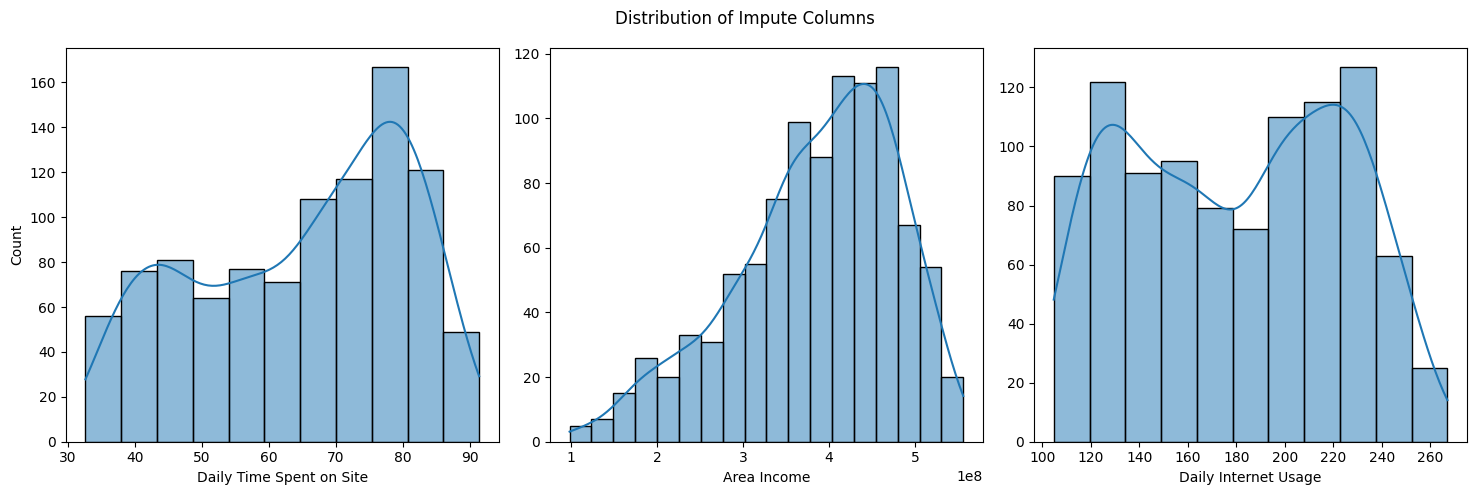

In [18]:
# Checking income distribution for imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

In [19]:
names = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ]
roll_nos = [ 4, 1, 3, 2 ]

# using zip() to map values
mapped = zip(names, roll_nos)

for index, (name, roll_no) in enumerate(mapped) :
    print(f'{index} : {name} - {roll_no}')

0 : Manjeet - 4
1 : Nikhil - 1
2 : Shambhavi - 3
3 : Astha - 2
